<a href="https://colab.research.google.com/github/ZaichenkoNA/Stat_Prac/blob/main/Dz2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem 1

Let $f(x) = 2\sin x - \cos{2x}$. Write a function `beauty_derivative_plot` that takes a point $x$ and plots the function $f(x)$ and its derivative $f'(x)$ in the range $x \in [-2\pi, 2\pi]$. The function should also plot the tangent line to the function at the point $x$.

Example of output for $x = -3, -2, 1.7$:

```python
beauty_derivative_plot(-3)
```
<img src="https://i.ibb.co/W4pyPfTX/tangent-line-3-0.png" width="600"/>

```python
beauty_derivative_plot(-2)
```
<img src="https://i.ibb.co/F4zDq8m0/tangent-line-2-0.png" width="600"/>

```python
beauty_derivative_plot(1.7)
```
<img src="https://i.ibb.co/TBmLXg2h/tangent-line-1-7.png" width="600"/>

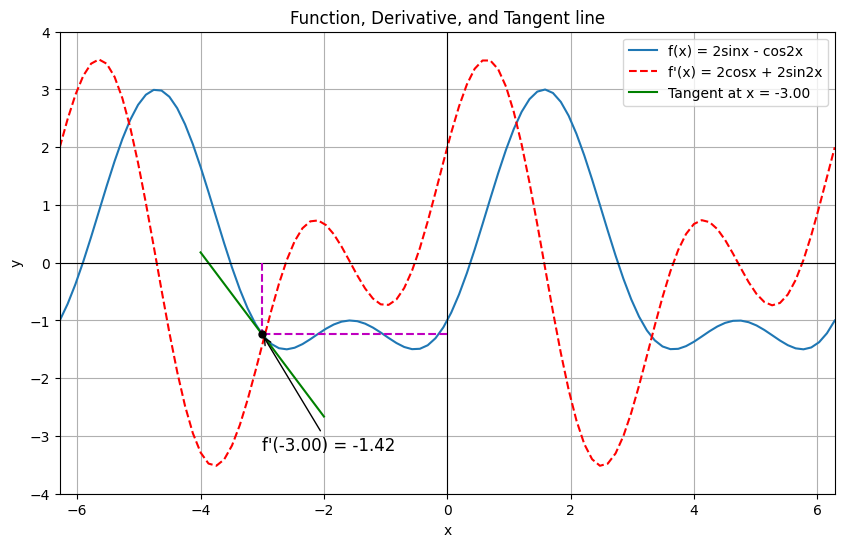

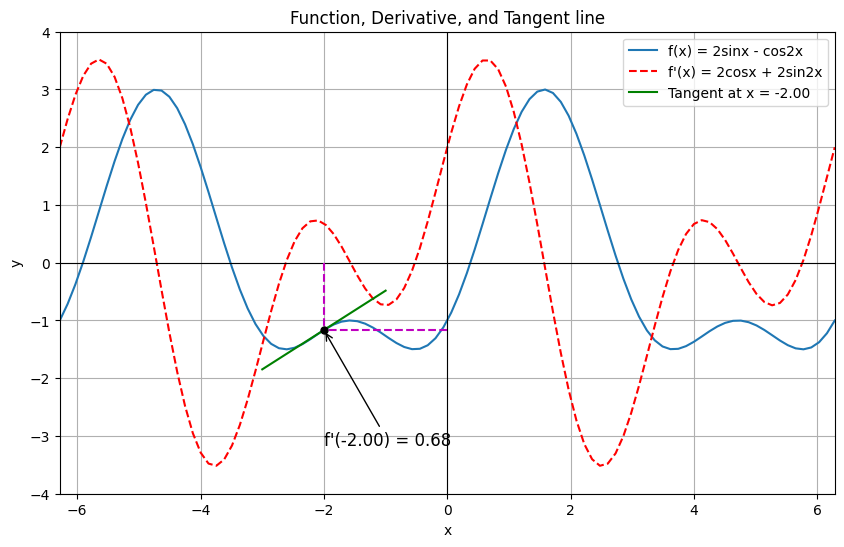

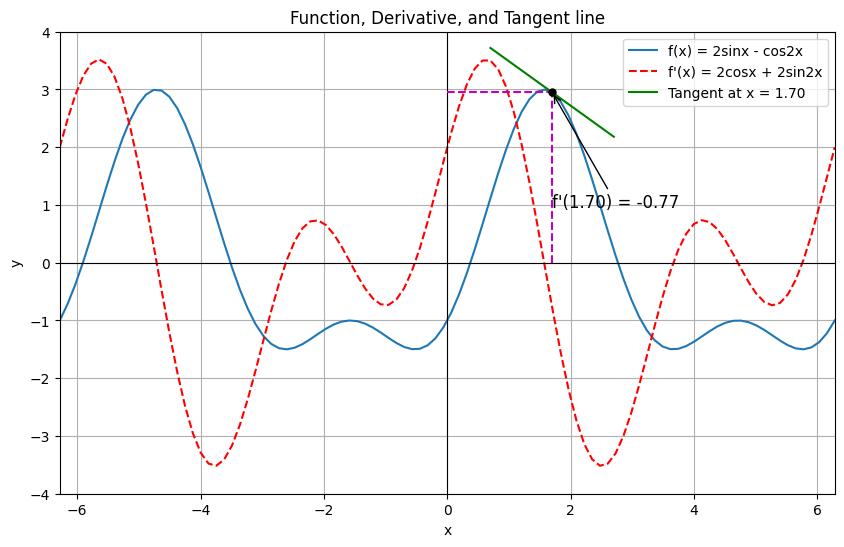

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def beauty_derivative_plot(w):

    fig, ax = plt.subplots(figsize=(10, 6))

    x = np.linspace(-2*np.pi, 2*np.pi, 100)

    # Функция
    f = 2*np.sin(x) - np.cos(2*x)

    # Производная функции
    f_prime = 2*np.cos(x) + 2*np.sin(2*x)

    # Построение графика функции и её производной
    ax.plot(x, f, label='f(x) = 2sinx - cos2x')
    ax.plot(x, f_prime, "r--", label="f'(x) = 2cosx + 2sin2x")

    # Вычисление значений функции и производной в точке w
    f_w = 2*np.sin(w) - np.cos(2*w)
    f_prime_w = 2*np.cos(w) + 2*np.sin(2*w)

    # Ограничение касательной по x на отрезке [w-1, w+1]
    x_tangent = np.linspace(w - 1, w + 1, 100)
    tangent_line = f_w + f_prime_w * (x_tangent - w)

    # Построение касательной
    ax.plot(x_tangent, tangent_line, "g", label=f'Tangent at x = {w:.2f}')

    # Выделение координатных осей
    ax.axhline(0, color='black', linewidth=0.8)
    ax.axvline(0, color='black', linewidth=0.8)

    # Перпендикуляры до осей
    ax.plot([w, w], [0, f_w], 'm--')
    ax.plot([0, w], [f_w, f_w], 'm--')

    # Точка (w, f_w)
    ax.plot(w, f_w, 'ko', markersize=5)


    # Подпись с значением производной
    derivative_label = f"f'({w:.2f}) = {f_prime_w:.2f}"
    ax.annotate(
        derivative_label,
        xy=(w, f_w),
        xytext=(w, f_w - 2),
        arrowprops=dict(
            arrowstyle='->',
            color='black',
            lw=1,
        ),
        fontsize=12,
        color='black'
    )


    # Настройка графика
    ax.grid(True)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('Function, Derivative, and Tangent line')
    ax.set_xlim(-2*np.pi, 2*np.pi)
    ax.set_ylim(-4, 4)

    # Размещение легенды в верхнем правом углу
    ax.legend(loc='upper right')


    plt.show()

beauty_derivative_plot(-3)
beauty_derivative_plot(-2)
beauty_derivative_plot(1.7)

## Problem 2

The data in [populations.txt](https://drive.google.com/file/d/1Bq7qVzbZIOd058VobGE6iYjUcMFkbZMt/view?usp=drive_link) describes the populations of hares, lynxes and carrots in northern Canada during 20 years. Do the following exercises **without for-loops**.

- Plot the population size of each species for each year on a single graph. Add legend and axis labels to the plot.

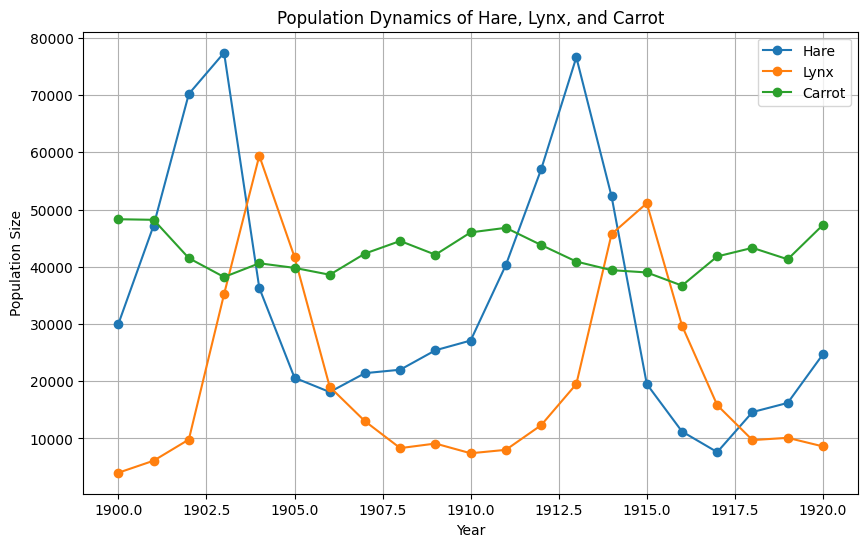

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Загружаем данные
data = np.loadtxt("populations.txt", comments="#")
years = data[:, 0].astype(int)  # Преобразуем годы в целые числа
hares = data[:, 1]
lynxes = data[:, 2]
carrots = data[:, 3]

# Строим график
plt.figure(figsize=(10, 6))
plt.plot(years, hares, marker='o', label='Hare')
plt.plot(years, lynxes, marker='o', label='Lynx')
plt.plot(years, carrots, marker='o', label='Carrot')


plt.xlabel("Year")
plt.ylabel("Population Size")
plt.title("Population Dynamics of Hare, Lynx, and Carrot")
plt.legend()
plt.grid(True)

plt.show()


- Find which year each species had the largest population. Mark these years in the plot of populations.

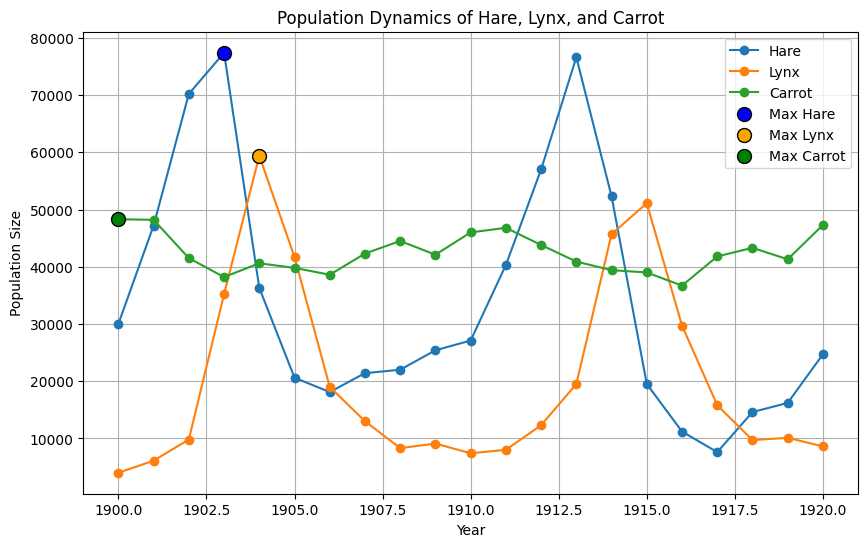

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Загружаем данные
data = np.loadtxt("populations.txt", comments="#")
years = data[:, 0].astype(int)
hares = data[:, 1]
lynxes = data[:, 2]
carrots = data[:, 3]

# Находим года с максимальной численностью
max_hare_year = years[np.argmax(hares)]
max_lynx_year = years[np.argmax(lynxes)]
max_carrot_year = years[np.argmax(carrots)]

# Соответствующие значения популяций
max_hare_pop = max(hares)
max_lynx_pop = max(lynxes)
max_carrot_pop = max(carrots)

# Строим график
plt.figure(figsize=(10, 6))
plt.plot(years, hares, marker='o', label='Hare')
plt.plot(years, lynxes, marker='o', label='Lynx')
plt.plot(years, carrots, marker='o', label='Carrot')

# Отмечаем точки максимумов
plt.scatter(max_hare_year, max_hare_pop, color='blue', s=100, label="Max Hare", edgecolors='black', zorder=3)
plt.scatter(max_lynx_year, max_lynx_pop, color='orange', s=100, label="Max Lynx", edgecolors='black', zorder=3)
plt.scatter(max_carrot_year, max_carrot_pop, color='green', s=100, label="Max Carrot", edgecolors='black', zorder=3)


plt.xlabel("Year")
plt.ylabel("Population Size")
plt.title("Population Dynamics of Hare, Lynx, and Carrot")
plt.legend()
plt.grid(True)

plt.show()


- Assuming total population of hares and lynxes is 100%, plot stacked bar graph showing ratio of each specis for each year in the period.

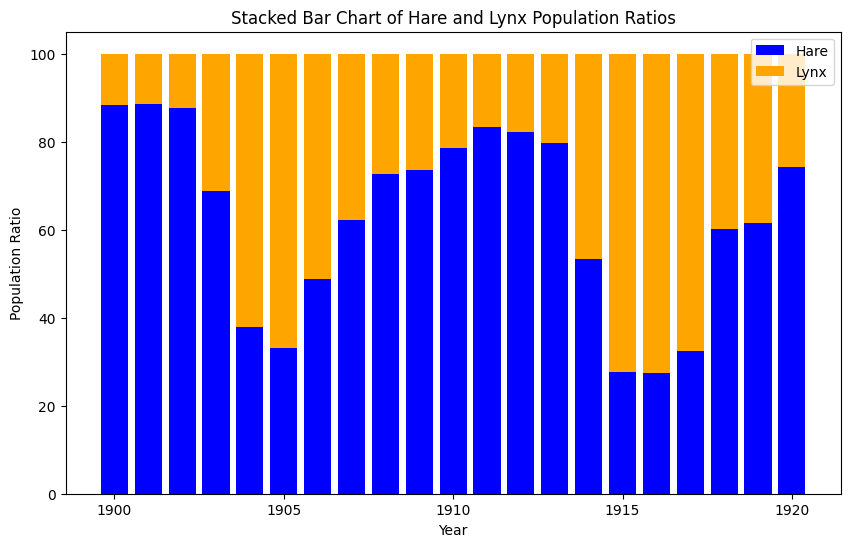

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Загружаем данные
data = np.loadtxt("populations.txt", comments="#")
years = data[:, 0].astype(int)
hares = data[:, 1]
lynxes = data[:, 2]

# Рассчитываем доли популяций
total = hares + lynxes
hare_ratio = hares / total * 100
lynx_ratio = lynxes / total * 100

# Строим столбчатую диаграмму
plt.figure(figsize=(10, 6))
plt.bar(years, hare_ratio, label='Hare', color='blue')
plt.bar(years, lynx_ratio, bottom=hare_ratio, label='Lynx', color='orange')


plt.xlabel("Year")
plt.ylabel("Population Ratio")
plt.title("Stacked Bar Chart of Hare and Lynx Population Ratios")
plt.legend()

plt.show()


- Find the mean and std of the populations of each species. Plot the historgam of population for each species and show mean values with vertical line. Show each histogram in a separate plot. Arrange 3 plots in a row.

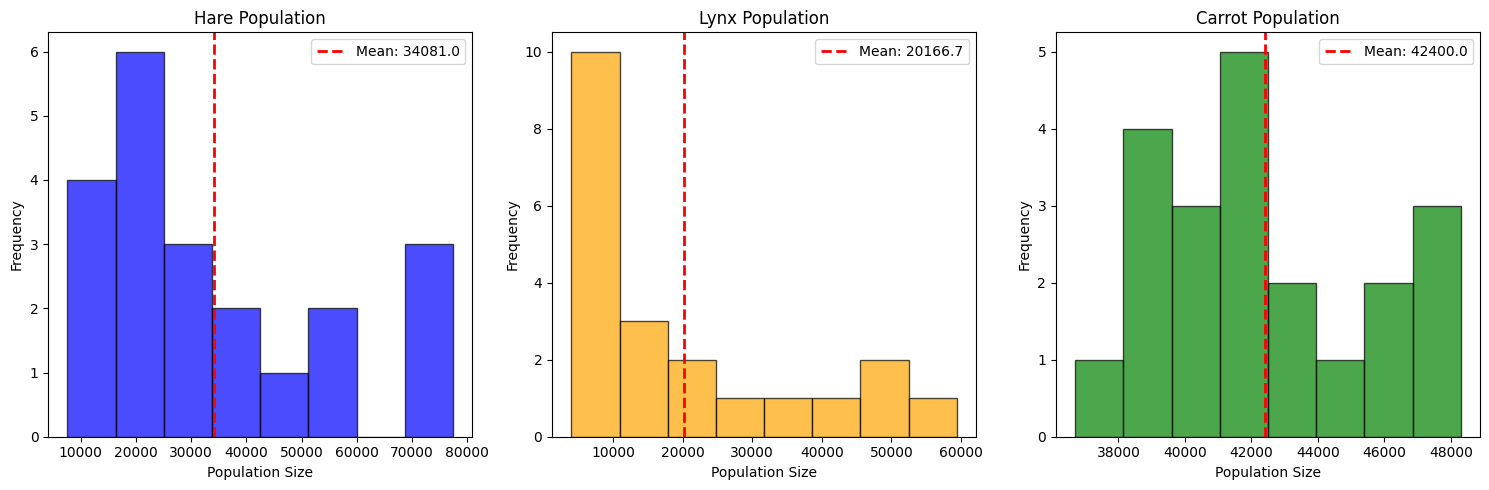

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Загружаем данные
data = np.loadtxt("populations.txt", comments="#")
hares = data[:, 1]
lynxes = data[:, 2]
carrots = data[:, 3]

# Вычисляем среднее и стандартное отклонение
mean_hare, std_hare = np.mean(hares), np.std(hares)
mean_lynx, std_lynx = np.mean(lynxes), np.std(lynxes)
mean_carrot, std_carrot = np.mean(carrots), np.std(carrots)

# Создаем графики
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Список данных и подписей
species = [('Hare', hares, mean_hare), ('Lynx', lynxes, mean_lynx), ('Carrot', carrots, mean_carrot)]
colors = ['blue', 'orange', 'green']

# Строим гистограммы
for i, (name, data, mean_val) in enumerate(species):
    axes[i].hist(data, bins=8, color=colors[i], alpha=0.7, edgecolor='black')
    axes[i].axvline(mean_val, color='red', linestyle='dashed', linewidth=2, label=f"Mean: {mean_val:.1f}")
    axes[i].set_title(f"{name} Population")
    axes[i].set_xlabel("Population Size")
    axes[i].set_ylabel("Frequency")
    axes[i].legend()


plt.tight_layout()
plt.show()


- Find which species (hares or lynxes) has the largest population for each year. Print the result as [H, H, L, H, ...]. Plot a pie chart showing the ratio of "H" and "L" values.

['H', 'H', 'H', 'H', 'L', 'L', 'L', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'L', 'L', 'L', 'H', 'H', 'H']


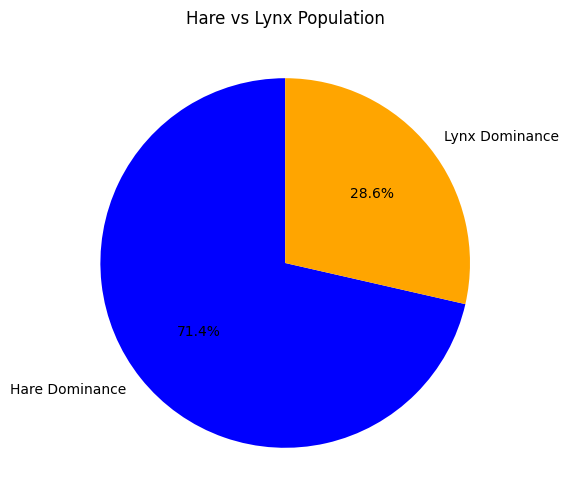

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Загружаем данные
data = np.loadtxt("populations.txt", comments="#")
years = data[:, 0].astype(int)
hares = data[:, 1]
lynxes = data[:, 2]

# Определяем, у кого популяция больше
comparison = np.where(hares > lynxes, 'H', 'L')

# Печатаем результат
print(list(comparison))

# Подсчитываем количество "H" и "L"
hare_count = np.sum(comparison == 'H')
lynx_count = np.sum(comparison == 'L')

# Строим круговую диаграмму
plt.figure(figsize=(6, 6))
plt.pie([hare_count, lynx_count], labels=['Hare Dominance', 'Lynx Dominance'],
        autopct='%1.1f%%', colors=['blue', 'orange'], startangle=90)

plt.title("Hare vs Lynx Population")
plt.show()


- Plot the change in the hare population and in the lynx population for each year. Find the correlation coefficient between the both time series.

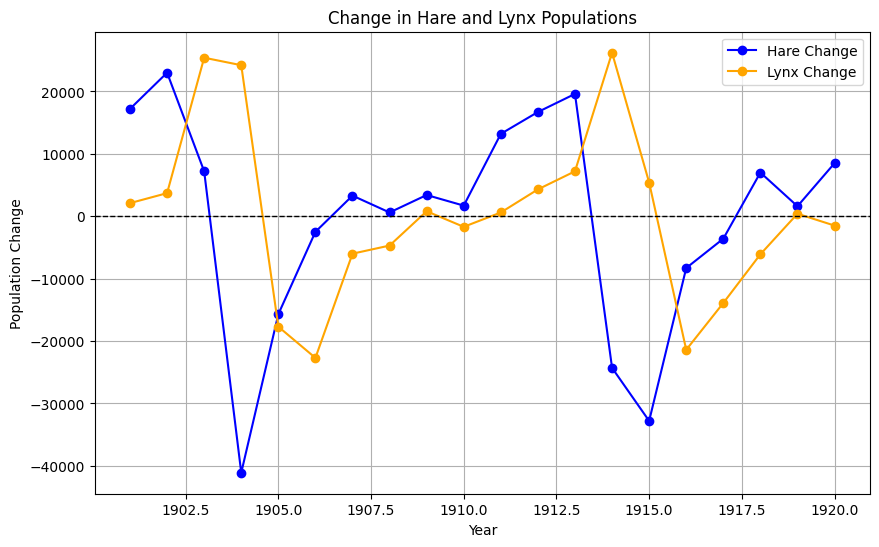

Correlation coefficient between hare and lynx population changes: -0.178


In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Загружаем данные
data = np.loadtxt("populations.txt", comments="#")
years = data[:, 0].astype(int)
hares = data[:, 1]
lynxes = data[:, 2]

# Вычисляем ежегодные изменения популяции
hare_changes = np.diff(hares)
lynx_changes = np.diff(lynxes)
years_diff = years[1:]

# Строим график изменений популяций
plt.figure(figsize=(10, 6))
plt.plot(years_diff, hare_changes, marker='o', label='Hare Change', color='blue')
plt.plot(years_diff, lynx_changes, marker='o', label='Lynx Change', color='orange')

plt.xlabel("Year")
plt.ylabel("Population Change")
plt.title("Change in Hare and Lynx Populations")
plt.axhline(0, color='black', linestyle='dashed', linewidth=1)
plt.legend()
plt.grid(True)

plt.show()

# Вычисляем коэффициент корреляции между изменениями популяций
correlation = np.corrcoef(hare_changes, lynx_changes)[0, 1]
print(f"Correlation coefficient between hare and lynx population changes: {correlation:.3f}")


- Using a scatter plot, show the population of hares vs lynxes by year (each point corresponds to a particular year, and the point coordinates correspond to the population of the two species in that year).

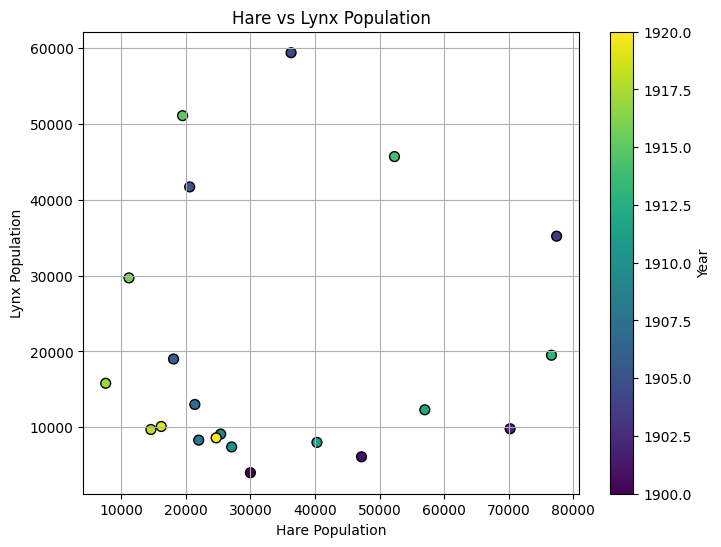

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Загружаем данные
data = np.loadtxt("populations.txt", comments="#")
hares = data[:, 1]
lynxes = data[:, 2]
years = data[:, 0].astype(int)

# Строим scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(hares, lynxes, c=years, cmap='viridis', edgecolors='black', s=50)


plt.xlabel("Hare Population")
plt.ylabel("Lynx Population")
plt.title("Hare vs Lynx Population")
plt.colorbar(label="Year")
plt.grid(True)

plt.show()


- Assume the population of hares in 1920 is unknown. Suggest a way to estimate this value. Compare an estimated value
with the true value and print a ratio of the error to the true value.

In [19]:
import numpy as np

# Загружаем данные
data = np.loadtxt("populations.txt", comments="#")
years = data[:, 0].astype(int)
hares = data[:, 1]

# Истинное значение численности зайцев в 1920 году
true_value = hares[years == 1920][0]

hare_1918 = hares[years == 1918][0]
hare_1919 = hares[years == 1919][0]

# Оценка на 1920 год с помощью линейной интерполяции
estimated_value = hare_1919 + (hare_1919 - hare_1918)

# Вычисляем относительную ошибку
error_ratio = abs(estimated_value - true_value) / true_value

# Вывод результатов
print(f"True hare population in 1920: {true_value}")
print(f"Estimated hare population in 1920: {estimated_value:.1f}")
print(f"Relative error: {error_ratio:.3f}")


True hare population in 1920: 24700.0
Estimated hare population in 1920: 17800.0
Relative error: 0.279
